In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web # 導入web套件讀取網站資料
import yfinance #import yahoo_finance
import numpy as np
import datetime

In [2]:
#start = "2022-7-1"  #start = datetime.datetime(2019,1,1)
#end = datetime.date.today()
#end = "2024-6-1"
#tsmc = web.get_data_yahoo("2330.tw",start,end) # 使用web套件讀取yahoo網站股票代號為2330的資料,依照起迄日期

In [3]:
tsmc = pd.read_csv('2330.TW.csv',index_col = 0)
tsmc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,471.5,474.0,452.5,453.5,435.351135,61744377
2022-07-04,443.0,451.5,440.0,440.0,422.391449,52445919
2022-07-05,449.5,451.5,433.0,446.0,428.151245,50084244
2022-07-06,442.0,447.5,435.0,435.5,418.071472,40549763
2022-07-07,442.0,459.0,438.5,457.5,439.191071,48151202
...,...,...,...,...,...,...
2024-05-27,872.0,878.0,866.0,869.0,865.654236,26726954
2024-05-28,867.0,873.0,865.0,865.0,861.669617,25329216
2024-05-29,861.0,868.0,856.0,857.0,853.700439,33436835


In [4]:
#周線 5days / 月線 20days /季線 60days / 半年線?　年線？　
tsmc["5d"] = np.round(tsmc["Adj Close"].rolling(window =5, center = False).mean(),2)
#分別計算5天、20天和60天的移動平均。center = False: 計算移動平均或移動標準差時，窗口不會在時間序列的中間對齊，而是以當前時間點為基準，向前計算指定大小的窗口
#因為這樣可以從當前時間點向前計算移動平均和移動標準差，反映出近期價格變化的趨勢和波動，通常能夠更及時地捕捉到市場的變化。因此，如果想知道長期變化，可設成center = True
tsmc["20d"] = np.round(tsmc["Adj Close"].rolling(window =20, center = False).mean(),2)
tsmc["60d"] = np.round(tsmc["Adj Close"].rolling(window =60, center = False).mean(),2)
tsmc["LBBand"] = tsmc["20d"] - 2*np.round(tsmc["Adj Close"].rolling(window =20, center = False).std(),2)#計算指定窗口大小的移動標準差，下限帶計算方法為 20天移動平均減去兩倍的20天移動標準差
tsmc["UBBand"] =  tsmc["20d"] + 2*np.round(tsmc["Adj Close"].rolling(window =20, center = False).std(),2)#上限帶計算方法為 20天移動平均加上兩倍的20天移動標準差

In [5]:
tsmc.loc[:,:] #完整的資料

,Open,High,Low,Close,Adj Close,Volume,5d,20d,60d,LBBand,UBBand
Date,,,,,,,,,,,
2022-07-01,471.5,474.0,452.5,453.5,435.351135,61744377,NaN,NaN,NaN,NaN,NaN
2022-07-04,443.0,451.5,440.0,440.0,422.391449,52445919,NaN,NaN,NaN,NaN,NaN
2022-07-05,449.5,451.5,433.0,446.0,428.151245,50084244,NaN,NaN,NaN,NaN,NaN
2022-07-06,442.0,447.5,435.0,435.5,418.071472,40549763,NaN,NaN,NaN,NaN,NaN
2022-07-07,442.0,459.0,438.5,457.5,439.191071,48151202,428.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,872.0,878.0,866.0,869.0,865.654236,26726954,859.88,818.49,784.79,754.75,882.23
2024-05-28,867.0,873.0,865.0,865.0,861.669617,25329216,864.66,821.97,787.75,756.73,887.21
2024-05-29,861.0,868.0,856.0,857.0,853.700439,33436835,863.26,825.31,790.59,760.79,889.83


In [6]:
tsmc.index

Index(['2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
       '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
       ...
       '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
       '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31'],
      dtype='object', name='Date', length=466)

# 繪製台積電股票的趨勢圖

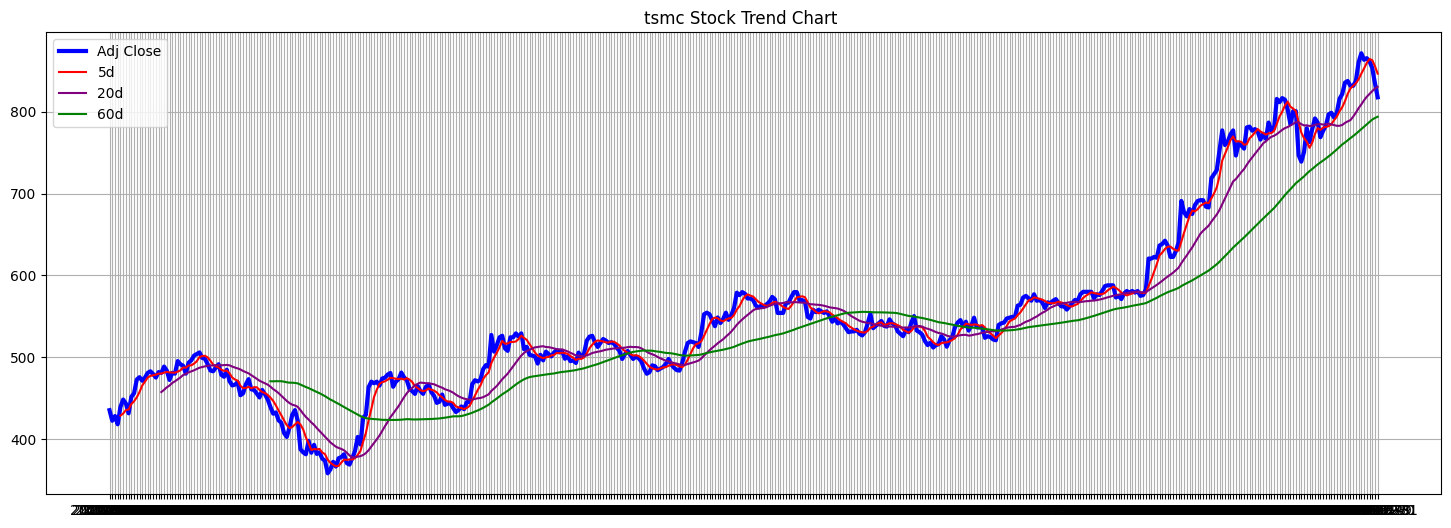

In [7]:
#日線/周線/月線/季線 
#包括日線（5天移動平均）、週線（20天移動平均）、月線（60天移動平均）的趨勢比較。
%matplotlib inline

plt.figure(figsize=(18,6))# Change the size of plots
plt.plot( tsmc["Adj Close"], color='blue' ,linewidth=3 ,label="Adj Close"  )
plt.plot( tsmc["5d"], color='red',label="5d"   )
plt.plot( tsmc["20d"], color='purple' ,label="20d"  )
plt.plot( tsmc["60d"], color='green' ,label="60d"  )

plt.title('tsmc Stock Trend Chart ')
plt.legend(loc='upper left')
plt.grid()
plt.show()


# 繪製台積電股票交易量的趨勢圖

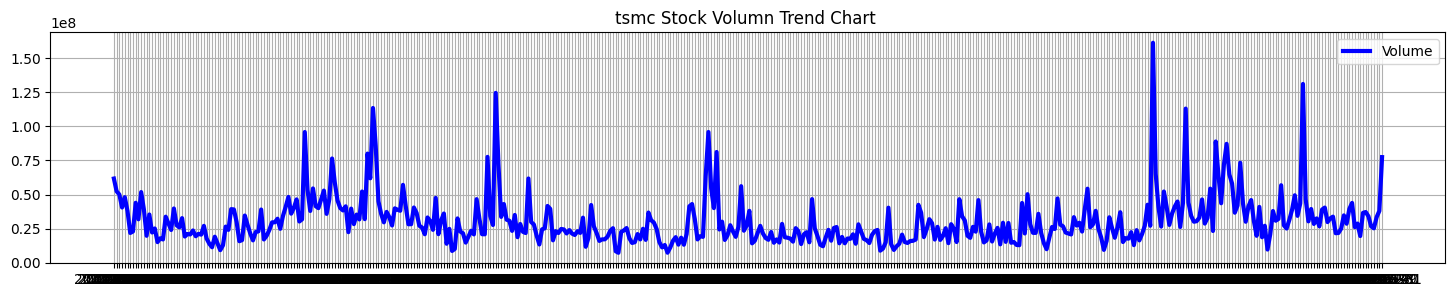

In [8]:
#繪製台積電的交易量，標示為 "Volume"。
%matplotlib inline
plt.figure(figsize=(18,3))# Change the size of plots
plt.plot( tsmc["Volume"], color='blue' ,linewidth=3 ,label="Volume"  )
plt.title('tsmc Stock Volumn Trend Chart ')
plt.legend(loc='upper right')
plt.grid()
plt.show()


# 繪製台積電股票的趨勢圖，包含Bollinger Bands的上下限。

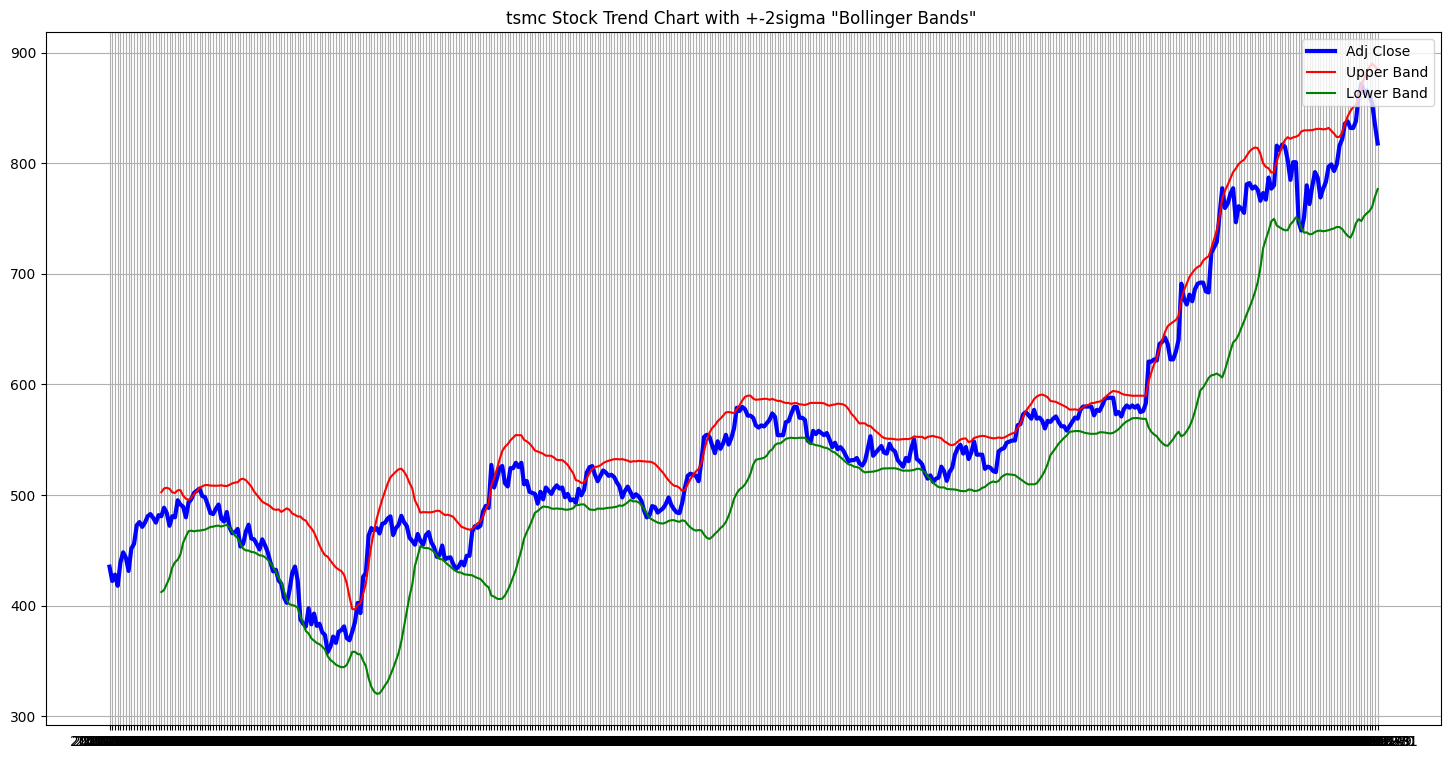

In [9]:
#tsmc Stock Trend Chart with +-2sigma "Bollinger Bands
#上限，為紅色。下限，顏色為綠色。
%matplotlib inline

plt.figure(figsize=(18,9))# Change the size of plots
plt.plot( tsmc["Adj Close"], color='blue' ,linewidth=3 ,label="Adj Close"  )
plt.plot( tsmc["UBBand"], color='red',label="Upper Band"   )
plt.plot( tsmc["LBBand"], color='green' ,label="Lower Band"  )
plt.title('tsmc Stock Trend Chart with +-2sigma "Bollinger Bands" ')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [10]:
tsmc.shape

tsmc[-15:]

,Open,High,Low,Close,Adj Close,Volume,5d,20d,60d,LBBand,UBBand
Date,,,,,,,,,,,
2024-05-13,823.0,825.0,818.0,819.0,815.846741,34812619,800.71,783.02,757.13,742.24,823.80
2024-05-14,816.0,825.0,811.0,825.0,821.823608,28691846,805.69,783.97,760.15,740.47,827.47
2024-05-15,838.0,844.0,837.0,839.0,835.769714,39467772,813.06,786.51,762.56,737.21,835.81
2024-05-16,852.0,856.0,837.0,841.0,837.762024,43927195,822.02,788.35,765.24,734.27,842.43
2024-05-17,848.0,848.0,834.0,835.0,831.785095,26207289,828.60,789.90,767.90,732.64,847.16
2024-05-20,834.0,838.0,822.0,835.0,831.785095,28808661,831.79,794.13,770.41,737.67,850.59
2024-05-21,830.0,841.0,830.0,841.0,837.762024,19705349,834.97,799.06,773.12,745.68,852.44
2024-05-22,845.0,865.0,843.0,864.0,860.673462,36628342,839.95,804.54,776.03,749.42,859.66
2024-05-23,875.0,877.0,867.0,875.0,871.631104,37266618,846.73,809.12,779.04,747.72,870.52


In [11]:
# 轉成list
sequence = tsmc["Adj Close"].to_list()
# sequence

In [14]:
# 將單變量時間序列分割成訓練樣本（特徵序列）和對應的標籤（下一個時間點的值）
from numpy import array

def split_sequence(sequence, n_steps):#sequence 是要分割的時間序列，n_steps 是每個訓練樣本的時間步數（窗口大小）
    X, y = list(), list()
    for i in range(len(sequence)):
        # 將單變量時間序列分割成訓練樣本（特徵序列）和對應的標籤（下一個時間點的值）
        end_ix = i + n_steps
        # 檢查是否超過了序列的長度，如果是則停止分割。
        if end_ix > len(sequence)-1:
            break
        # 根據窗口的起始和結束，將序列分為輸入部分 seq_x（特徵）和輸出部分 seq_y（標籤）
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]#將每個窗口的特徵和對應的標籤添加到 X 和 y 中
        X.append(seq_x)#將每個窗口的特徵和對應的標籤添加到 X 和 y 中
        y.append(seq_y)
    return array(X), array(y)#將 X 和 y 轉換為 numPy 後返回。

#第1~10 天的資料當作特徵 第11天的資料當作 label
n_steps = 10 #設置窗口大小為 10
X, y = split_sequence(sequence, n_steps)#split_sequence 函式，將 sequence 中的數據按照窗口大小分割成訓練樣本 X 和對應的標籤 y

top = 10#顯示前 10 筆訓練樣本X和對應的標籤 y
for i in zip(X[:top], y[:top]):
    print(i)

(array([435.351135, 422.391449, 428.151245, 418.071472, 439.191071,
       448.310852, 443.510986, 431.511139, 451.670807, 455.990723]), 472.790405)
(array([422.391449, 428.151245, 418.071472, 439.191071, 448.310852,
       443.510986, 431.511139, 451.670807, 455.990723, 472.790405]), 475.670258)
(array([428.151245, 418.071472, 439.191071, 448.310852, 443.510986,
       431.511139, 451.670807, 455.990723, 472.790405, 475.670258]), 471.350403)
(array([418.071472, 439.191071, 448.310852, 443.510986, 431.511139,
       451.670807, 455.990723, 472.790405, 475.670258, 471.350403]), 475.190308)
(array([439.191071, 448.310852, 443.510986, 431.511139, 451.670807,
       455.990723, 472.790405, 475.670258, 471.350403, 475.190308]), 480.950165)
(array([448.310852, 443.510986, 431.511139, 451.670807, 455.990723,
       472.790405, 475.670258, 471.350403, 475.190308, 480.950165]), 482.870148)
(array([443.510986, 431.511139, 451.670807, 455.990723, 472.790405,
       475.670258, 471.350403, 475.190

In [15]:
X.shape, y.shape

((456, 10), (456,))

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
n_features = 1
# define model 
# 不做 SimpleRNN
# LSTM
# Bidirectional LSTM
# １　hidden layer 256神經元 , input_shape=(10,1)

model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(600, activation='relu')))
model.add(Dense(1))
# model.add(LSTM(256, input_shape=(n_steps, n_features),unroll=False))
# model.add(Dense(1))
model.summary()

#這段程式碼演示了如何從單變量時間序列中創建訓練樣本和標籤，用於機器學習模型的訓練。每個訓練樣本包含連續的 n_steps 個時間區間，而對應的標籤則是這些時間區間之後的一個值

c:\python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1200)                │       4,113,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,378,993 (16.70 MB)

 Trainable params: 4,378,993 (16.70 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# fit# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(456, 10, 1)


In [18]:
#分拆 train , test
split=0.8
split_boundary = int(X.shape[0]*split)
train_x = X[:split_boundary ] # 前80% 當作 train 的特徵
test_x = X[split_boundary: ] # 後20% 當作 test 的特徵
train_y = y[:split_boundary ] # 前80% 當作 train 的 label
test_y = y[split_boundary: ] # 後20% 當作 test 的 label

In [19]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((364, 10, 1), (92, 10, 1), (364,), (92,))

In [20]:
#loss function is mean square error　／mean_absolute_error
model.compile(optimizer='adam', loss='mse',metrics=['RootMeanSquaredError'])#有開根號

In [21]:
# fit model batch_size=10可以不用 因為有test_x,test_y
history = model.fit(train_x, train_y, batch_size=10, epochs=20, validation_split=0.1, verbose=1)
# history = model.fit(train_x, train_y, batch_size=10, validation_data=(test_x,test_y), verbose=1)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - RootMeanSquaredError: 174.2668 - loss: 36388.1680 - val_RootMeanSquaredError: 8.1471 - val_loss: 66.3754
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - RootMeanSquaredError: 21.1421 - loss: 449.8903 - val_RootMeanSquaredError: 7.0361 - val_loss: 49.5071
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - RootMeanSquaredError: 23.5902 - loss: 571.1171 - val_RootMeanSquaredError: 17.1696 - val_loss: 294.7956
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - RootMeanSquaredError: 22.0704 - loss: 489.7257 - val_RootMeanSquaredError: 9.0050 - val_loss: 81.0899
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - RootMeanSquaredError: 22.3184 - loss: 502.7053 - val_RootMeanSquaredError: 18.3703 - val_loss: 337.4694
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - RootMeanSquaredError: 22.4121 - loss: 503.5589 - val_RootMeanSquaredError: 12.7063 - val_loss: 161.4490
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - RootMean

In [22]:
# fit model batch_size=10可以不用 因為有test_x,test_y
history = model.fit(train_x, train_y, batch_size=10, epochs=20, validation_split=0.1, verbose=1)
# history = model.fit(train_x, train_y, batch_size=10, validation_data=(test_x,test_y), verbose=1)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - RootMeanSquaredError: 20.9893 - loss: 446.5255 - val_RootMeanSquaredError: 7.8557 - val_loss: 61.7118
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - RootMeanSquaredError: 15.8314 - loss: 255.3993 - val_RootMeanSquaredError: 17.2973 - val_loss: 299.1953
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - RootMeanSquaredError: 17.8139 - loss: 319.8892 - val_RootMeanSquaredError: 27.9436 - val_loss: 780.8465
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - RootMeanSquaredError: 18.1523 - loss: 334.8422 - val_RootMeanSquaredError: 6.8070 - val_loss: 46.3354
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - RootMeanSquaredError: 19.5443 - loss: 384.4074 - val_RootMeanSquaredError: 9.6638 - val_loss: 93.3883
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - RootMeanSquaredError: 16.0804 - loss: 259.8675 - val_RootMeanSquaredError: 14.9303 - val_loss: 222.9149
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - RootMeanSqu

In [23]:
# test dataset 92筆預測
y_pred = model.predict(test_x)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step


In [24]:
import pandas as pd
table = pd.DataFrame(y_pred,columns=['y_pred'])
table['test_y'] = pd.DataFrame(test_y) 
table

,y_pred,test_y
0,597.665405,579.047668
1,599.555420,581.030701
2,599.145874,579.047668
3,598.529724,581.030701
4,598.182129,575.081543
...,...,...
87,879.040649,865.654236
88,880.789673,861.669617
89,883.384644,853.700439
90,885.446289,834.773560


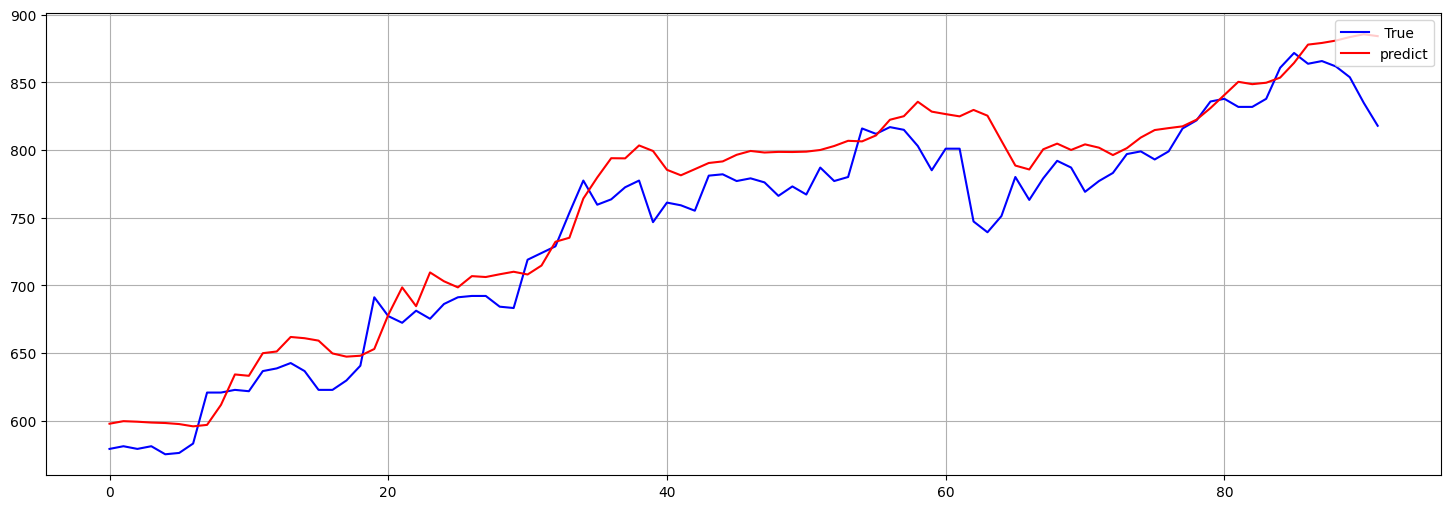

In [25]:
plt.figure(figsize=(18,6))

plt.plot(test_y, color='blue' ,label=" True "     )
plt.plot(y_pred, color='red' ,label="predict"     )
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [26]:
X[-1],y_pred[-1]

(array([[831.785095],
        [831.785095],
        [837.762024],
        [860.673462],
        [871.631104],
        [863.661926],
        [865.654236],
        [861.669617],
        [853.700439],
        [834.77356 ]]),
 array([884.07446], dtype=float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


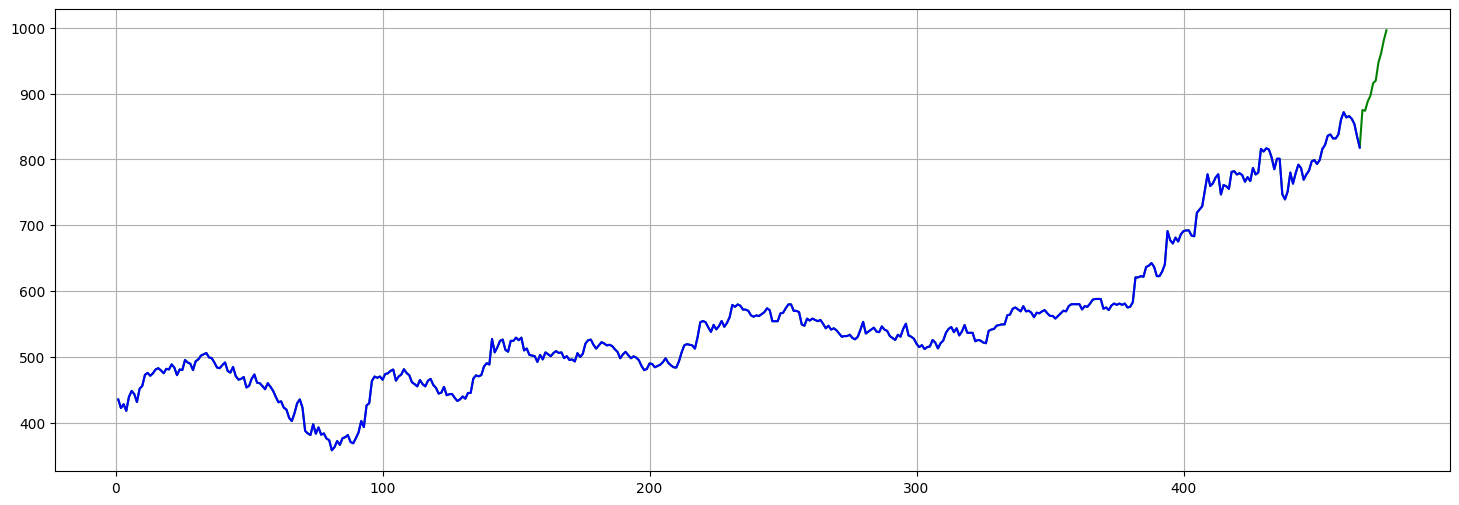

In [29]:
#使用訓練好的模型進行時間序列的預測，並將預測結果與原始序列進行比較
#[... 012345678910111213 14 15 16]
import numpy as np
import matplotlib.pyplot as plt
next_time = 10
hist = sequence[-1 * n_steps:]#從原始序列中取最後 n_steps 個時間步作為歷史資料
X_test = array(hist).reshape(-1, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

pred = sequence.copy()

for i in range(next_time):
    nx = model.predict(X_test)[0][0]#使用模型預測下一個時間點的值
    pred.append(nx)    #將預測的值添加到 pred 中，相當於模擬未來的數據。
    data = pred[-1 * n_steps:] #取最後 n_steps 個數據準備用於下一次的預測
    X_test = array(data).reshape(-1, n_steps).astype('float32') #將最後 n_steps 個數據轉換為 mumPy 
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) #再次調整輸入資料的維度，準備進行下一次預測

plt.figure(figsize=(18,6))    
plt.plot(range(1, 1+len(pred)), pred, color='green')    
plt.plot(range(1, 1+len(sequence)), sequence, color='blue') 
plt.grid()
plt.show()